<a href="https://colab.research.google.com/github/Tharunchandubatla/Tharun_INFO5731_Fall2023/blob/main/INFO5731_Assignment_Three_fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [ ]:
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import pandas as pd
import nltk
from nltk import bigrams, trigrams
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk import pos_tag, RegexpParser

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Read the CSV file
df = pd.read_csv('/content/Top Gun_ Maverick_user_reviews (1).csv')

# Extract the  column from the DataFrame
dataset = df['User Reviews'].tolist()

# Tokenize and tag parts of speech
tokenized_dataset = [word_tokenize(sentence) for sentence in dataset]
pos_tagged_dataset = [pos_tag(tokens) for tokens in tokenized_dataset]

# (1) Count the frequency of all the N-grams (N=3)
n_grams = list(trigrams([token for sentence in tokenized_dataset for token in sentence]))
freq_dist_n_grams = FreqDist(n_grams)

print("(1) Frequency of all the N-grams (N=3):")
print(freq_dist_n_grams)

# (2) Calculate the probabilities for all the bigrams in the dataset
bigrams_list = list(bigrams([token for sentence in tokenized_dataset for token in sentence]))
freq_dist_bigrams = FreqDist(bigrams_list)

probabilities_bigrams = {}
for bigram in freq_dist_bigrams:
    count_bigram = freq_dist_bigrams[bigram]
    count_w2 = freq_dist_bigrams[bigram[:1]]

    # Check if count_w2 is zero to avoid division by zero
    if count_w2 != 0:
        probabilities_bigrams[bigram] = count_bigram / count_w2
    else:
        probabilities_bigrams[bigram] = 0.0

print("\n(2) Probabilities for all bigrams:")
print(probabilities_bigrams)

# (3) Extract all the noun phrases and calculate relative probabilities
noun_phrases = []

for tagged_sentence in pos_tagged_dataset:
    grammar = r"""NP: {<DT>?<JJ>*<NN>}"""
    chunk_parser = RegexpParser(grammar)
    tree = chunk_parser.parse(tagged_sentence)

    for subtree in tree.subtrees(filter=lambda t: t.label() == 'NP'):
        noun_phrases.append(' '.join([word for word, tag in subtree.leaves()]))

# Calculate frequency of each noun phrase
freq_dist_noun_phrases = FreqDist(noun_phrases)

# Calculate relative probabilities for each review
relative_probabilities = {}
for i, sentence in enumerate(tokenized_dataset):
    max_freq = max(freq_dist_noun_phrases.values())
    relative_probabilities[f"Review {i+1}"] = {noun_phrase: freq_dist_noun_phrases[noun_phrase] / max_freq
                                                for noun_phrase in freq_dist_noun_phrases}

# Print the result in a table
print("\n(3) Relative Probabilities of Noun Phrases:")
columns = list(freq_dist_noun_phrases.keys())
print("Review\t", end="")
for column in columns:
    print(f"{column}\t", end="")
print()

for review, probabilities in relative_probabilities.items():
    print(f"{review}\t", end="")
    for column in columns:
        print(f"{probabilities[column]:.2f}\t", end="")
    print()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


(1) Frequency of all the N-grams (N=3):
<FreqDist with 5925 samples and 2505198 outcomes>

(2) Probabilities for all bigrams:
{('Top', 'Gun'): 0.0, (',', 'and'): 0.0, ('of', 'the'): 0.0, ('in', 'the'): 0.0, ('the', 'original'): 0.0, ('.', 'The'): 0.0, ('.', 'I'): 0.0, ('the', 'first'): 0.0, ('.', 'It'): 0.0, (',', 'the'): 0.0, (',', 'but'): 0.0, ('Tom', 'Cruise'): 0.0, ('Gun', ':'): 0.0, (':', 'Maverick'): 0.0, ('from', 'the'): 0.0, ('the', 'movie'): 0.0, ('to', 'the'): 0.0, ('is', 'a'): 0.0, ('it', "'s"): 0.0, ('the', 'film'): 0.0, ('with', 'the'): 0.0, (',', 'it'): 0.0, ('and', 'the'): 0.0, ('for', 'the'): 0.0, ('.', 'But'): 0.0, ('this', 'movie'): 0.0, ('.', 'And'): 0.0, ('to', 'be'): 0.0, (',', 'I'): 0.0, ('it', '.'): 0.0, ('first', 'one'): 0.0, ('the', 'action'): 0.0, ('on', 'the'): 0.0, ('it', 'was'): 0.0, ('do', "n't"): 0.0, ('movie', ','): 0.0, ('film', '.'): 0.0, ('Jennifer', 'Connelly'): 0.0, ('Maverick', 'is'): 0.0, ("'s", 'a'): 0.0, ('.', 'This'): 0.0, ('.', 'So'): 0.0, ('i

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Read the CSV file
df = pd.read_csv('/content/Top Gun_ Maverick_user_reviews (1).csv')

# Extract the  column from the DataFrame
dataset = df['User Reviews'].tolist()

# Design a query
query = "An Outstanding movie with a haunting performance and best character development"

# Combine the dataset and query
all_documents = dataset + [query]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_documents)

# Compute cosine similarity between the query and each document
cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1]).flatten()

# Create a DataFrame to store document indices and their corresponding cosine similarities
result_df = pd.DataFrame({'Document': range(1, len(dataset) + 1), 'Cosine Similarity': cosine_similarities})

# Sort the DataFrame based on cosine similarities in descending order
result_df = result_df.sort_values(by='Cosine Similarity', ascending=False)

# Convert the document indices to integers
result_df['Document'] = result_df['Document'].astype(int)

# Print the ranked documents
print("Ranked Documents:")
print(result_df)

# Get the most similar document
most_similar_document_index = result_df.iloc[0]['Document']
most_similar_document = dataset[int(most_similar_document_index) - 1]

print(f"\nMost Similar Document (Index {most_similar_document_index}):\n{most_similar_document}")


Ranked Documents:
      Document  Cosine Similarity
9999     10000           0.063943
6724      6725           0.063943
1549      1550           0.063943
4824      4825           0.063943
8949      8950           0.063943
...        ...                ...
5226      5227           0.009378
7301      7302           0.009378
1426      1427           0.009378
5251      5252           0.009378
6201      6202           0.009378

[10000 rows x 2 columns]

Most Similar Document (Index 10000.0):
Basically my only problem with the first Top Gun is the relationship between Maverick and Charlie, the love story, i'm fine with them at first but later on i don't care anymore, that's it, the rest of the first Top Gun was badass, it was great and it was fascinating, Top Gun: Maverick, a long wait sequel, my first problem with this movie is nothing, zero, and yes there is still a love story in this one but i like it, it did not bother me at all, i'm fine with it, is it necessary? No, but Jennifer Connel

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


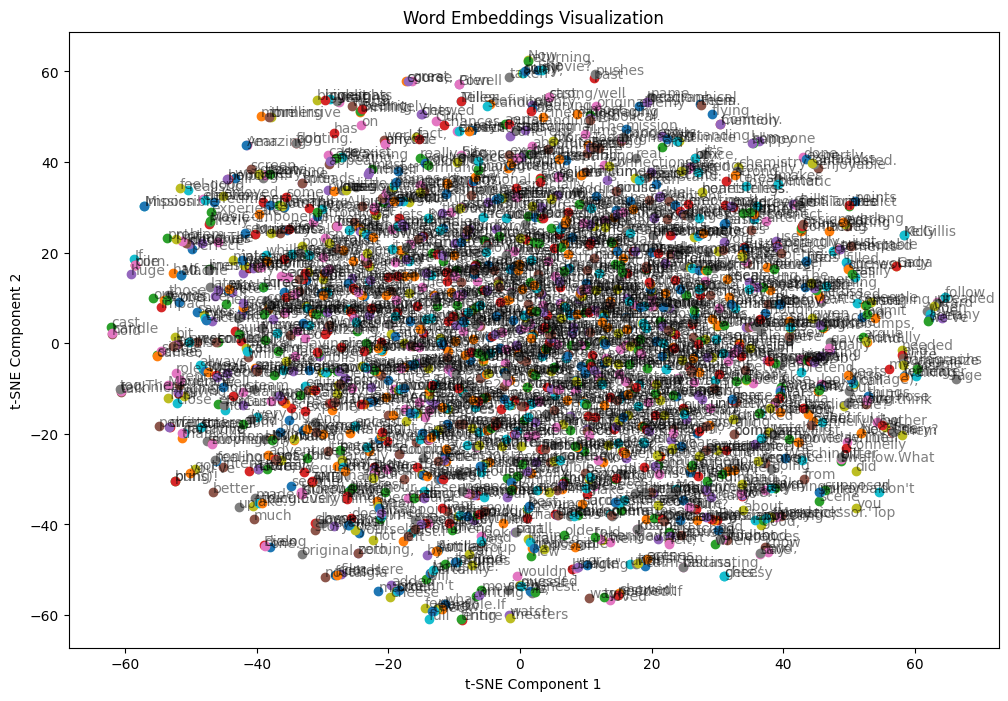

In [13]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/Top Gun_ Maverick_user_reviews (1).csv')


corpus = [str(text).split() for text in df['User Reviews']]

# Train Word2Vec model
embedding_size = 300
window_size = 5
min_word_count = 1
workers = 4

word2vec_model = Word2Vec(sentences=corpus, vector_size=embedding_size, window=window_size, min_count=min_word_count, workers=workers)

# Save the model
word2vec_model.save('word2vec_model.model')

# Visualize word embeddings using t-SNE
words = list(word2vec_model.wv.index_to_key)
vectors = word2vec_model.wv[words]

tsne_model = TSNE(n_components=2, random_state=42)
vectors_tsne = tsne_model.fit_transform(vectors)

# Create a DataFrame for visualization
df_tsne = pd.DataFrame(vectors_tsne, columns=['x', 'y'])
df_tsne['word'] = words

# Plot the word embeddings
plt.figure(figsize=(12, 8))
for i, word in enumerate(df_tsne['word']):
    plt.scatter(df_tsne.loc[i, 'x'], df_tsne.loc[i, 'y'])
    plt.annotate(word, (df_tsne.loc[i, 'x'], df_tsne.loc[i, 'y']), alpha=0.5)

plt.title('Word Embeddings Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file



# Link:https://github.com/Tharunchandubatla/Tharun_INFO5731_Fall2023/blob/main/annotated_dataset.csv



